# Dataset 2: Boston Housing Dataset

In [82]:
import warnings
warnings.filterwarnings("ignore")

1. Load the dataset.

In [50]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

data = datasets.load_boston()

2. Fit a linear regression model:

(a) Set MEDV as the target variable and the other attributes as the features and
ordinary least square as the penalty function.

(b) Perform a 10 fold cross validation, analyze the significance of different variables
with the statistics obtained from the model you have trained, and the averaged
Root Mean Squared Error (RMSE), and plot 1) fitted values against true values
as scatter plots using the whole dataset; 2) residuals versus fitted values as
scatter plots using the whole dataset.

In [58]:
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["MEDV"])

In [59]:
np.set_printoptions(precision=4)

In [60]:
def mse(predicted, actual):
    return mean_squared_error(predicted, actual)

In [96]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(np.array([np.concatenate((v,[1])) for v in data.data]))
y = target["MEDV"]
linreg = LinearRegression()

linreg.fit(X,y)
p = linreg.predict(X)
# Now we can constuct a vector of errors
err = abs(p-y)
total_error = np.dot(err,err)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))

cv_train_rmse, cv_test_rmse = [], []
min_test_rmse = float("inf")

    
kf = KFold(n_splits=10, shuffle=True)
xval_err = 0
for train,test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    
    linreg.fit(X[train],y[train])
    # p = np.array([linreg.predict(xi) for xi in x[test]])
    p = linreg.predict(X[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
    train_rmse = mse(linreg.predict(X_train), y_train)
    test_rmse = mse(linreg.predict(X_test), y_test)
    
    if test_rmse < min_test_rmse:
        min_test_rmse = test_rmse
        best_model = linreg

    cv_train_rmse.append(train_rmse)
    cv_test_rmse.append(test_rmse)

avg_train_rmse = np.sqrt(np.mean(cv_train_rmse))

avg_test_rmse = np.sqrt(np.mean(cv_test_rmse))
print("Coefficients are : ", best_model.coef_, "\n")
unreg_coeff = best_model.coef_
best_model_y_predict = best_model.predict(X)

rmse_10cv = np.sqrt(xval_err/len(X))

method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %avg_test_rmse)

Coefficients are :  [-0.9103  1.0243  0.2381  0.6843 -2.208   2.4799  0.4777 -2.8539  2.862
 -2.0533 -2.1999  0.723  -4.1269  0.    ] 

Method: Simple Linear Regression
RMSE on training: 4.6792
RMSE on 10-fold CV: 4.8509


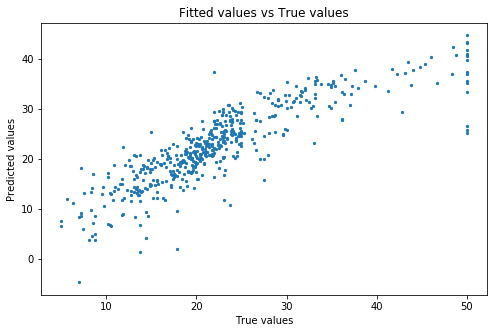

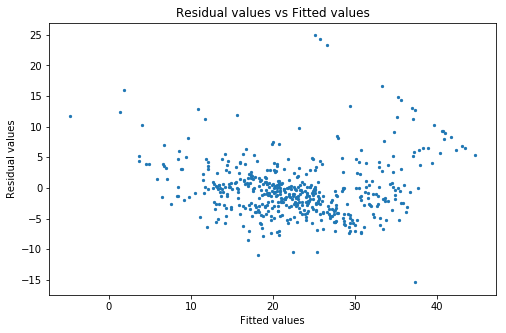

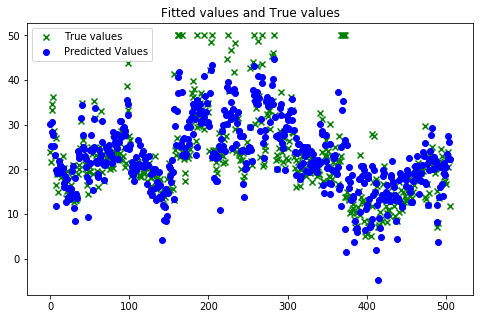

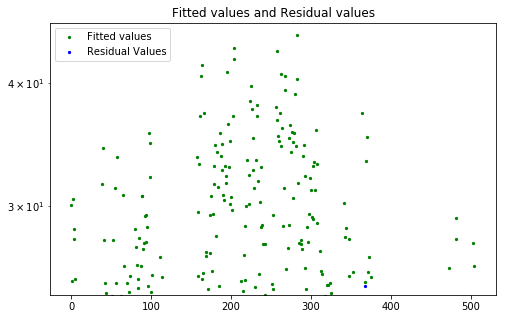

In [63]:
#Plot
best_model_y_predict = best_model_y_predict.reshape(y.shape)

plt.figure(figsize=(8, 5))
plt.scatter(y, best_model_y_predict, s=5)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Fitted values vs True values")
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(best_model_y_predict, y - best_model_y_predict, s=5)
plt.xlabel("Fitted values")
plt.ylabel("Residual values")
plt.title("Residual values vs Fitted values")
plt.show()


plt.figure(figsize=(8, 5))
plt.scatter(range(len(y)), y, c='g', marker='x', label='True values')
plt.scatter(range(len(y)), best_model_y_predict, c='b', marker='o', label='Predicted Values')
plt.title("Fitted values and True values")
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(range(len(y)), best_model_y_predict, c='g', s=5, zorder=2, label='Fitted values')
plt.scatter(range(len(y)), np.subtract(y, best_model_y_predict), c='b', s=5, zorder=1, label='Residual Values')
plt.title("Fitted values and Residual values")
plt.legend(loc='upper left')
plt.yscale('log')
plt.show()


In [64]:
#Function for performing fitting across different models
def linear_regression(X, y, plot=True, model=LinearRegression()):
    kf = KFold(n_splits=10, shuffle=True)

    cv_train_rmse, cv_test_rmse = [], []
    min_test_rmse = float("inf")

    for train_index, test_index in kf.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        lm = model
        lm.fit(X_train, y_train)
        train_rmse = mse(lm.predict(X_train), y_train)
        test_rmse = mse(lm.predict(X_test), y_test)

        if test_rmse < min_test_rmse:
            min_test_rmse = test_rmse
            best_model = lm

        cv_train_rmse.append(train_rmse)
        cv_test_rmse.append(test_rmse)

    avg_train_rmse = np.sqrt(np.mean(cv_train_rmse))
    avg_test_rmse = np.sqrt(np.mean(cv_test_rmse))

    print("Coefficients are : ", best_model.coef_)
    best_model_y_predict = best_model.predict(X)
    if plot:
        best_model_y_predict = best_model_y_predict.reshape(y.shape)

        plt.figure(figsize=(8, 5))
        plt.scatter(y, best_model_y_predict, s=5)
        plt.xlabel("True values")
        plt.ylabel("Predicted values")
        plt.title("Fitted values vs True values")
        plt.show()

        plt.figure(figsize=(8, 5))
        plt.scatter(best_model_y_predict, y - best_model_y_predict, s=5)
        plt.xlabel("Fitted values")
        plt.ylabel("Residual values")
        plt.title("Residual values vs Fitted values")
        plt.show()

        plt.figure(figsize=(8, 5))
        plt.scatter(range(len(y)), y, c='g', marker='x', label='True values')
        plt.scatter(range(len(y)), best_model_y_predict, c='b', marker='o', label='Predicted Values')
        plt.title("Fitted values and True values")
        plt.legend(loc='upper left')
        plt.show()

        plt.figure(figsize=(8, 5))
        plt.scatter(range(len(y)), best_model_y_predict, c='g', s=5, zorder=2, label='Fitted values')
        plt.scatter(range(len(y)), np.subtract(y, best_model_y_predict), c='b', s=5, zorder=1, label='Residual Values')
        plt.title("Fitted values and Residual values")
        plt.legend(loc='upper left')
        plt.yscale('log')
        plt.show()
    return avg_train_rmse, avg_test_rmse

Coefficients are :  [ 0.091   0.8108 -0.7453 ... -1.297  -0.7785  0.    ]


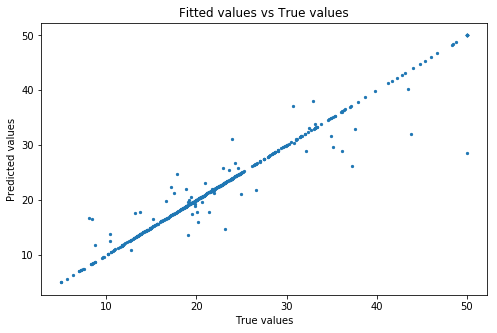

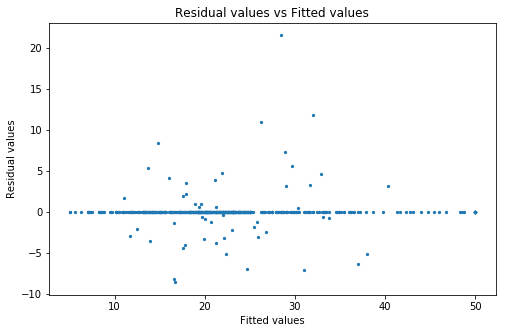

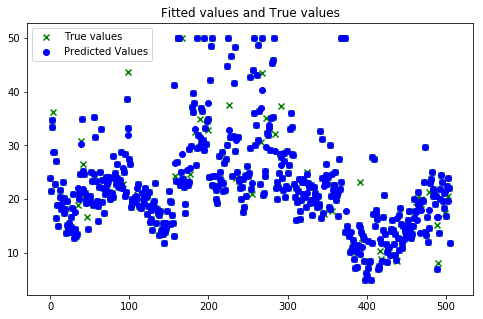

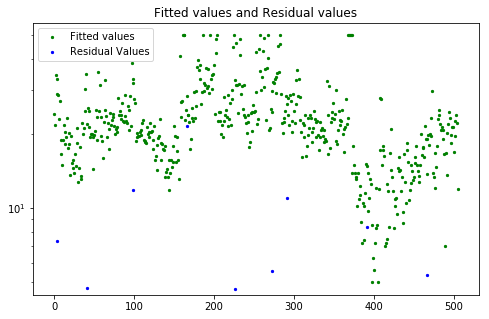

4.3290743323302004e-14 5.959177504221205


In [83]:
#Also performed one hot encoding which gives amazing results
#This is extra work, they removed this later but it gives really good results, so can we include it?
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
X_2 = df.apply(le.fit_transform)
X_2.head()

enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_2)

# 3. Transform
onehot_encoded = enc.transform(X_2).toarray()
onehot_encoded.shape

train_rmse, test_rmse = linear_regression(onehot_encoded, y)

print(train_rmse, test_rmse)

3. In this part, we try to control overfitting via regularization of the parameters.

(a) You are asked to try the following regularizations with suitable parameters.
1. Ridge Regularizer
2. Lasso Regularizer
3. Elastic Net Regularizer (optional)

Optimize over choices of alpha to pick one good model, report the best
RMSE obtained via 10-fold cross validation. Compare the values of the esti-
mated coefficients for these regularized good models, with the unregularized
best model.

In [87]:
from sklearn.preprocessing import StandardScaler
#Performing scaling
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Lasso Regularization: 

Best Alpha is:  0.05 

Coefficients are :  [-0.7612  0.937   0.      0.767  -1.774   2.9475 -0.     -2.8862  1.9713
 -1.469  -1.933   0.803  -3.7118  0.    ]


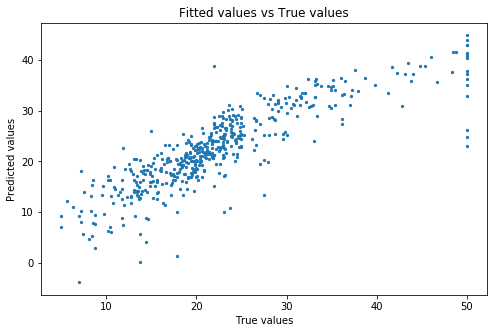

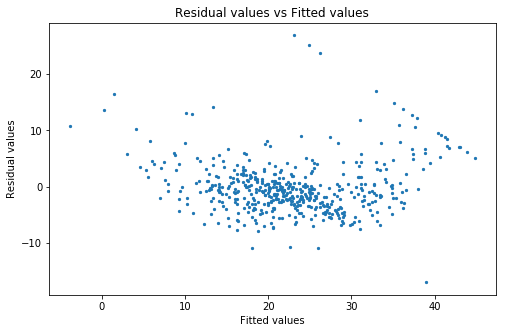

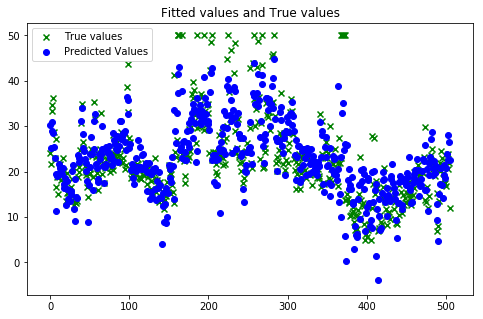

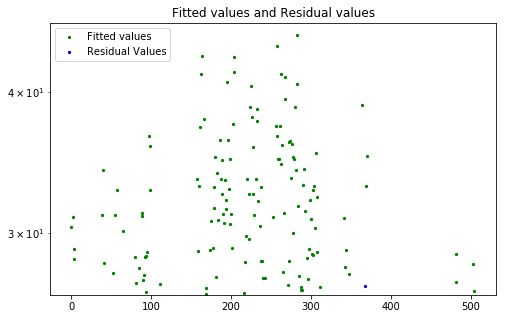

Train RMSE: 4.681179998757116
Test 4.894305307475566

Ridge Regularization: 

Best Alpha is:  5.0 

Coefficients are :  [-0.8582  1.0748 -0.0476  0.6657 -2.1123  2.5172  0.2823 -3.1226  2.4274
 -1.7755 -2.196   0.8846 -3.8342  0.    ]


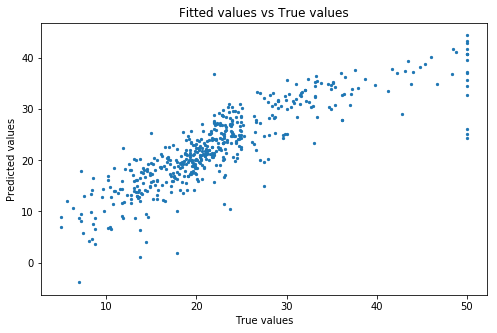

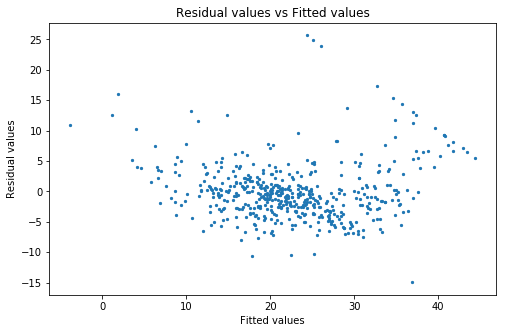

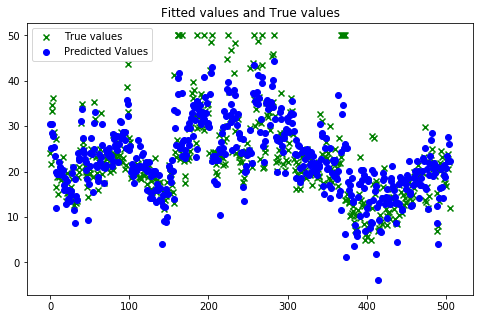

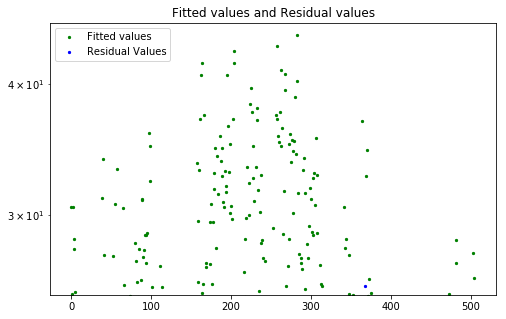

Train RMSE: 4.671031235732091
Test 4.889083540462942

Elastic Net Regularization:
Best Alpha is:  0.1 

Coefficients are :  [-0.112   0.0512 -0.0753  1.1142 -0.1148  3.1368 -0.0087 -1.2071  0.2873
 -0.013  -0.8146  0.0099 -0.5855  0.    ]


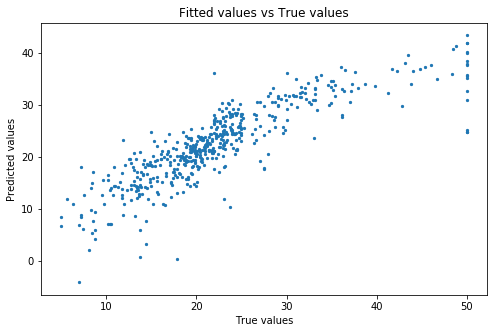

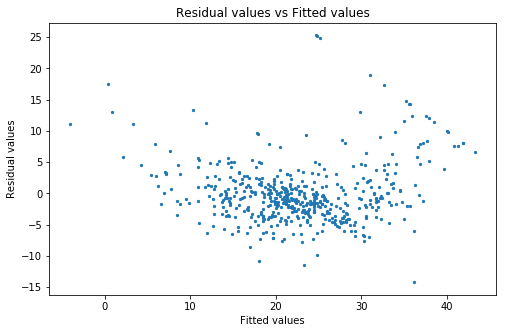

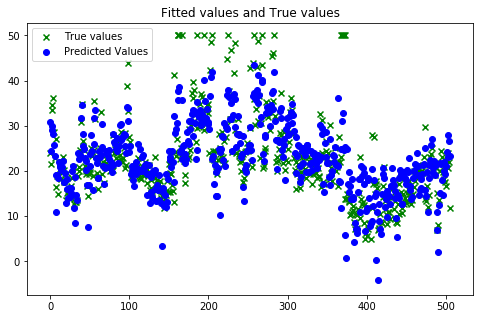

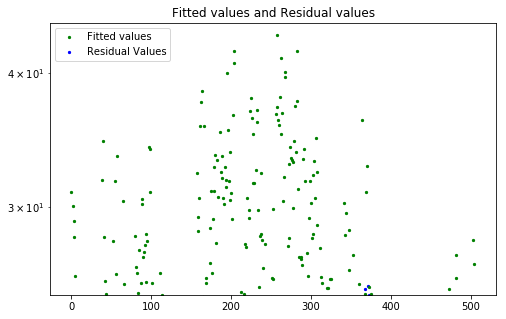

Train RMSE: 4.804756145238804
Test RMSE 4.941506271946506


In [86]:
#Final plot with best alpha value: 0.001

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

alphas=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]


print('Lasso Regularization: \n')
regr_cv = LassoCV(alphas=alphas)
model_cv=regr_cv.fit(X_std, y)
print("Best Alpha is: ", model_cv.alpha_, "\n")
train_rmse, test_rmse = linear_regression(X_std, y, model = Lasso(alpha = model_cv.alpha_))
print("Train RMSE:", train_rmse)
print("Test", test_rmse)
print('=======================================================================\n')



print('Ridge Regularization: \n')
regr_cv = RidgeCV(alphas=alphas)
model_cv=regr_cv.fit(X_std, y)
print("Best Alpha is: ", model_cv.alpha_, "\n")
train_rmse, test_rmse = linear_regression(X_std, y, model = Ridge(alpha = model_cv.alpha_))
print("Train RMSE:", train_rmse)
print("Test", test_rmse)
print('=======================================================================\n')


print('Elastic Net Regularization:')
regr_cv = ElasticNetCV(alphas=alphas)
model_cv=regr_cv.fit(X_std, y)
print("Best Alpha is: ", model_cv.alpha_, "\n")
train_rmse, test_rmse = linear_regression(X, y, model = ElasticNet(alpha = model_cv.alpha_))
print("Train RMSE:", train_rmse)
print("Test RMSE", test_rmse)


print('=======================================================================\n')

print("Estimated coefficient for unregularized model: ")